# Problem Statement
##### Forecast the CocaCola prices data set. 
Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

# Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing CSV File

In [2]:
# Importing the csv file
coca = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",sheet_name='Sheet1')
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# EDA

In [3]:
coca=coca.set_index('Quarter')

In [4]:
# to see top 5 columns
coca.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [5]:
# information about dataframe
coca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [6]:
#Counts the number of duplicated rows in the DataFrame 
coca.duplicated().sum()

0

In [7]:
# Computes descriptive statistics of the DataFrame
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [8]:
# to see values of index
coca.index

Index(['Q1_86', 'Q2_86', 'Q3_86', 'Q4_86', 'Q1_87', 'Q2_87', 'Q3_87', 'Q4_87',
       'Q1_88', 'Q2_88', 'Q3_88', 'Q4_88', 'Q1_89', 'Q2_89', 'Q3_89', 'Q4_89',
       'Q1_90', 'Q2_90', 'Q3_90', 'Q4_90', 'Q1_91', 'Q2_91', 'Q3_91', 'Q4_91',
       'Q1_92', 'Q2_92', 'Q3_92', 'Q4_92', 'Q1_93', 'Q2_93', 'Q3_93', 'Q4_93',
       'Q1_94', 'Q2_94', 'Q3_94', 'Q4_94', 'Q1_95', 'Q2_95', 'Q3_95', 'Q4_95',
       'Q1_96', 'Q2_96'],
      dtype='object', name='Quarter')

##### Feature Engineering

In [9]:
coca.index = coca.index.str.replace(r'(Q\d)_(\d+)', r'\2-\1')
coca.head()

,Sales
Quarter,
86-Q1,1734.827000
86-Q2,2244.960999
86-Q3,2533.804993
86-Q4,2154.962997
87-Q1,1547.818996


In [10]:
# converting indexing to quaterly
coca.index = pd.PeriodIndex(coca.index, freq='Q').to_timestamp()
coca.head()

,Sales
Quarter,
2086-01-01,1734.827000
2086-04-01,2244.960999
2086-07-01,2533.804993
2086-10-01,2154.962997
2087-01-01,1547.818996


In [11]:
coca.index

DatetimeIndex(['2086-01-01', '2086-04-01', '2086-07-01', '2086-10-01',
               '2087-01-01', '2087-04-01', '2087-07-01', '2087-10-01',
               '2088-01-01', '2088-04-01', '2088-07-01', '2088-10-01',
               '2089-01-01', '2089-04-01', '2089-07-01', '2089-10-01',
               '2090-01-01', '2090-04-01', '2090-07-01', '2090-10-01',
               '2091-01-01', '2091-04-01', '2091-07-01', '2091-10-01',
               '2092-01-01', '2092-04-01', '2092-07-01', '2092-10-01',
               '2093-01-01', '2093-04-01', '2093-07-01', '2093-10-01',
               '2094-01-01', '2094-04-01', '2094-07-01', '2094-10-01',
               '2095-01-01', '2095-04-01', '2095-07-01', '2095-10-01',
               '2096-01-01', '2096-04-01'],
              dtype='datetime64[ns]', name='Quarter', freq='QS-OCT')

## Time Series Analysis

<AxesSubplot:xlabel='Quarter'>

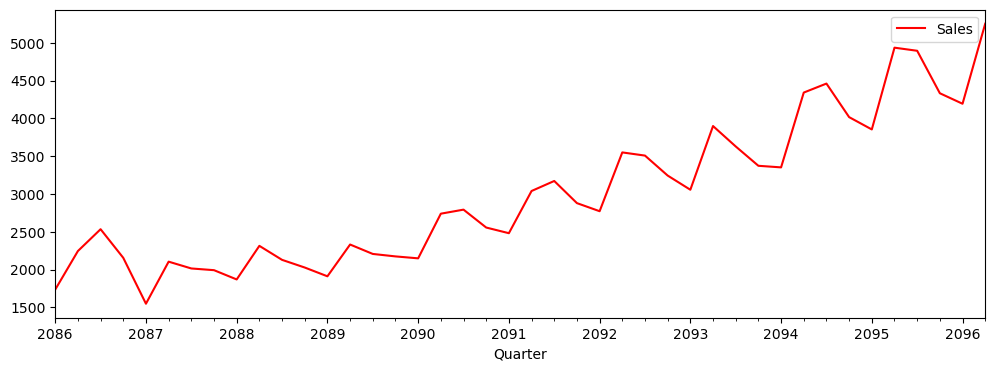

In [12]:
# Line plot
coca.plot(figsize=(12,4),color='r')

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

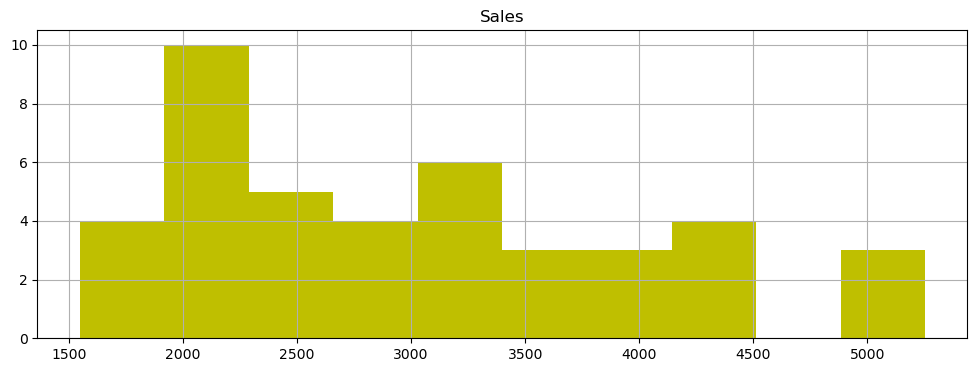

In [13]:
# histogram
coca.hist(figsize=(12,4),color='y')

<AxesSubplot:ylabel='Density'>

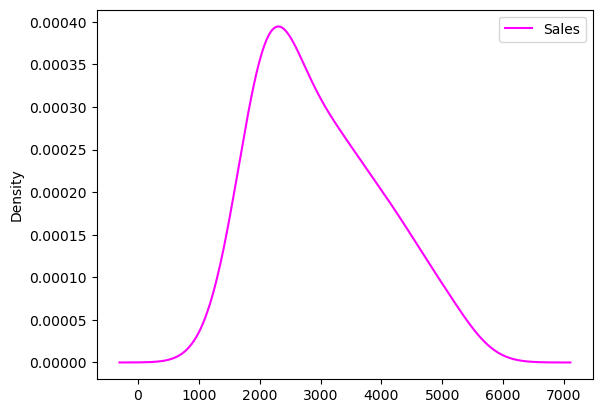

In [14]:
# Density Plot
coca.plot(kind='kde',color='magenta')

### Time series decomposition

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive seasonal decompose

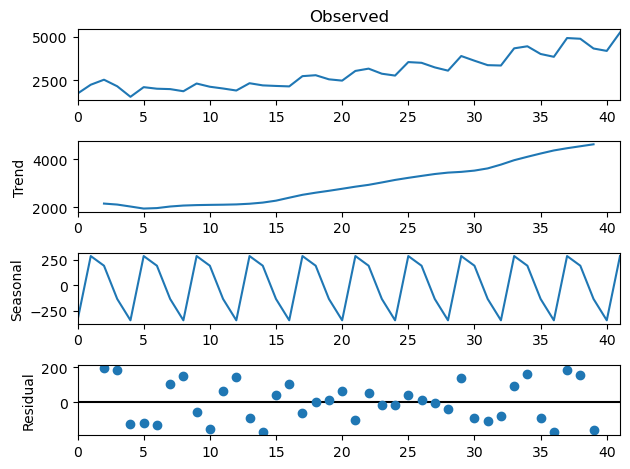

In [16]:
# Additive progression
# frequency=4 for quarterly data
ts_decomp= seasonal_decompose((coca.values),model='additive',period = 4)
ts_plot = ts_decomp.plot()

### Multiplicative seasonal decompose

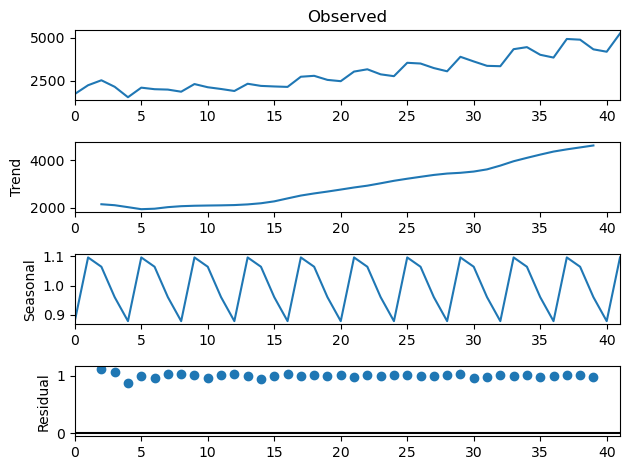

In [17]:
# Multiplicative sesonality
# frequency=4 for quarterly data
ts_decomp_mul= seasonal_decompose((coca.values),model='multiplicative',period=4)
ts_plot_mul = ts_decomp_mul.plot()

## Forecasting models building

In [18]:
len(coca)

42

# Inference
The length of the DataFrame df1 is being determined using the len() function. The resulting value is 42, indicating that df1 contains 42 rows of data.

# To Splitting the data into Training Testing Data

In [19]:
## Splitting into train and test data
coca_train=coca[0:28]
coca_test=coca[28:]

In [20]:
print("Total records in train set:",len(coca_train))
print("Total records in test set:",len(coca_test))

Total records in train set: 28
Total records in test set: 14


## 1. Simple Moving Average

In [21]:
# Averagely growth
coca_ma=coca.copy()

In [22]:
train_len=28

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
roll_val=[]
rmse_val=[]

for i in range(4,28,4):
    coca_ma['ma_forecast'] = coca_ma['Sales'].rolling(i).mean()
    coca_ma['ma_forecast'][train_len:] = coca_ma['ma_forecast'][train_len-1]
    rmse_ma = mean_squared_error(coca_test['Sales'],coca_ma['ma_forecast'][train_len:],squared=False).round(2)
    roll_val.append(i)
    rmse_val.append(rmse_ma)


In [25]:
d=pd.DataFrame({'Rolling window':roll_val,'rmse':rmse_val})
d

,Rolling window,rmse
0,4,1049.59
1,8,1205.98
2,12,1357.90
3,16,1527.27
4,20,1643.99
5,24,1749.03


In [26]:
coca_ma['ma_forecast'] = coca_ma['Sales'].rolling(4).mean()
coca_ma['ma_forecast'][train_len:] = coca_ma['ma_forecast'][train_len-1]
rmse_ma = mean_squared_error(coca_test['Sales'],coca_ma['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

1049.59

# Inference
The mean_squared_error function is used to calculate the root mean squared error (RMSE) eventually. The 'coca_ma' DataFrame's 'ma_forecast' column provides the forecasted values, which are then compared to the actual sales values from the test set. Only the test set values are considered for this comparison. The resulting RMSE value, rounded to two decimal places, is 1049.59.

The RMSE value represents the average discrepancy between the forecasted sales values and the actual sales values in the test set. A higher RMSE value implies a larger forecasting error, suggesting that the MA model may not accurately capture the underlying patterns and variations in the sales data.

## 2. Simple Exponential Smoothing

In [27]:
# Exponential Smoothning
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [28]:
coca_test

,Sales
Quarter,
2093-01-01,3056.0
2093-04-01,3899.0
2093-07-01,3629.0
2093-10-01,3373.0
2094-01-01,3352.0
2094-04-01,4342.0
2094-07-01,4461.0
2094-10-01,4017.0
2095-01-01,3854.0


In [29]:
coca_test.index[0]

Timestamp('2093-01-01 00:00:00', freq='QS-OCT')

In [30]:
coca_test.index[-1]

Timestamp('2096-04-01 00:00:00', freq='QS-OCT')

In [31]:
ses_model = SimpleExpSmoothing(coca_train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = coca_test.index[0],end = coca_test.index[-1])

In [32]:
rmse_ses = mean_squared_error(coca_test['Sales'],pred_ses,squared=False).round(2)
rmse_ses

1225.36

# Inference
The RMSE value obtained is 1225.36, which has been rounded to two decimal places. This value represents the average deviation between the projected sales values from the SES model and the actual sales values from the test set. A higher RMSE value implies a greater forecasting error, indicating that the SES model may not accurately capture the inherent patterns and variations in the sales data.

It is important to consider the specific dataset and the range of sales values when interpreting RMSE values. Furthermore, comparing this RMSE value with the previously calculated value for the MA model (1049.59) suggests that, in this particular case, the MA model might have a slightly lower forecasting error than the SES model.

## 3. Holt's Method

In [33]:
# Holt's method
from statsmodels.tsa.holtwinters import Holt

In [34]:
holt_model = Holt(coca_train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = coca_test.index[0],end = coca_test.index[-1])

In [35]:
rmse_holt = mean_squared_error(coca_test['Sales'],pred_holt,squared=False).round(2)
rmse_holt

538.41

# Inference
The RMSE value obtained is 538.41, rounded to two decimal places, in this particular case. This numerical representation signifies the average deviation between the predicted sales values using the Holt's linear approach and the actual sales values from the test set. A smaller RMSE value indicates a lesser forecasting error, implying that the Holt's linear method might offer more precise forecasts when compared to the previously mentioned MA and SES models.

It's crucial to consider the context of the specific dataset and the sales value range when interpreting RMSE values. Moreover, a comparison between this RMSE value and the previously computed values for the MA model (1049.59) and the SES model (1225.36) suggests that the Holt's linear method could exhibit a considerably lower forecasting error in this particular scenario.

## 4. Holt's Exponential Smoothing

### a. Additive Method

In [36]:
#Holt's Exponential Smoothing-Additive Method
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [37]:
hes_add_add = ExponentialSmoothing(coca_train['Sales'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hes_add_add = hes_add_add.predict(start = coca_test.index[0],end = coca_test.index[-1])

In [38]:
rmse_hes_add_add = mean_squared_error(coca_test['Sales'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

431.44

# Inference
The resulting RMSE value is 431.44, rounded to two decimal places. This value indicates the average difference between the forecasted sales values from the HES-Add-Add method and the actual sales values from the test set. A lower RMSE value suggests a smaller forecasting error, indicating that the HES-Add-Add method may be providing more accurate forecasts compared to the MA, SES, and Holt's linear models mentioned earlier.

It's important to note that the interpretation of RMSE values should be done in the context of the specific dataset and the range of sales values. Additionally, comparing this RMSE value with the previous ones calculated for the MA model (1049.59), SES model (1225.36), and Holt's linear model (538.41) suggests that the HES-Add-Add method may have a significantly lower forecasting error in this case, indicating improved forecasting accuracy.

### b. Multiplicative Method

In [39]:
#Holt's Exponential Smoothing-Multiplicative Method
hes_mul_add = ExponentialSmoothing(coca_train['Sales'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = coca_test.index[0],end = coca_test.index[-1])

In [40]:
rmse_hes_mul_add = mean_squared_error(coca_test['Sales'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

603.07

# inference
The resulting RMSE value is 603.07, rounded to two decimal places. This value indicates the average difference between the forecasted sales values from the HES-Mul-Add method and the actual sales values from the test set. A lower RMSE value suggests a smaller forecasting error, indicating that the HES-Mul-Add method may be providing more accurate forecasts compared to the MA, SES, Holt's linear, and HES-Add-Add models mentioned earlier.

It's important to note that the interpretation of RMSE values should be done in the context of the specific dataset and the range of sales values. Additionally, comparing this RMSE value with the previous ones calculated for the MA model (1049.59), SES model (1225.36), Holt's linear model (538.41), and HES-Add-Add model (431.44) suggests that the HES-Mul-Add method may have a lower forecasting error than the previous models, indicating improved forecasting accuracy.

## 5. ARIMA model

### ACF Plot

In [41]:
# ACF Plot
from statsmodels.graphics.tsaplots import plot_acf

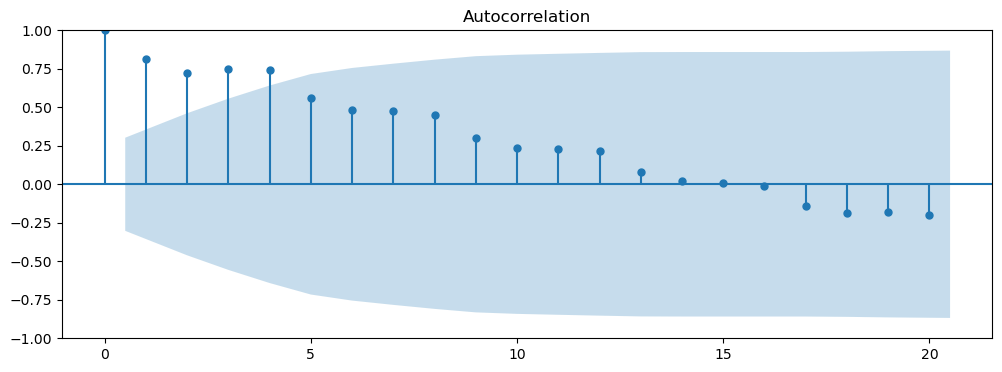

In [42]:
# Show autocorrelation upto lag 20
plt.figure(figsize=(12,4))
acf_plot = plot_acf( coca['Sales'],ax=plt.gca(),lags=20)
plt.show()

### PCF Plot

In [43]:
#PCF Plot
from statsmodels.graphics.tsaplots import plot_pacf

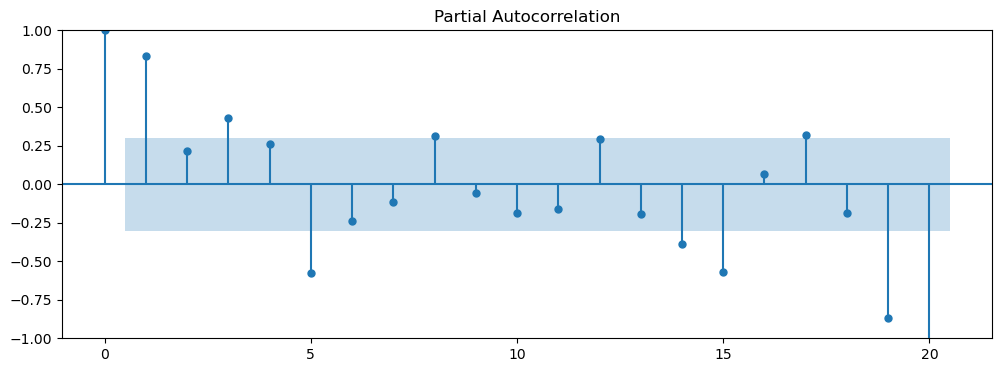

In [44]:
plt.figure(figsize=(12,4))
pacf_plot = plot_pacf( coca['Sales'],ax=plt.gca(),lags=20)
plt.show()

In [45]:
from statsmodels.tsa.arima_model import ARIMA

In [46]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [47]:
arima = ARIMA(coca_train['Sales'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = coca_test.index[0],end = coca_test.index[-1])

In [48]:
rmse_arima = mean_squared_error(coca_test['Sales'],pred_arima,squared=False).round(2)
rmse_arima

1062.27

# inference
The resulting RMSE value is 1062.27, rounded to two decimal places. This value indicates the average difference between the forecasted sales values from the ARIMA model and the actual sales values from the test set. A lower RMSE value suggests a smaller forecasting error, indicating that the ARIMA model may be providing more accurate forecasts compared to some of the previous models mentioned earlier, but not necessarily all of them.

It's important to note that the interpretation of RMSE values should be done in the context of the specific dataset and the range of sales values. Additionally, comparing this RMSE value with the previous ones calculated for the MA model (1049.59), SES model (1225.36), Holt's linear model (538.41), HES-Add-Add model (431.44), and HES-Mul-Add model (603.07) suggests that the ARIMA model may have a higher forecasting error than some of the other models, indicating potential limitations in capturing the patterns and variations in the sales data.

## Choosing the best model

In [49]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses,rmse_holt,rmse_hes_add_add,rmse_hes_mul_add,rmse_arima]
d={'Models':models,'Rmse':rmse}
coca_model=pd.DataFrame(d)
coca_model

,Models,Rmse
0,simple_moving_average,1049.59
1,simple_expo_smoothing,1225.36
2,Holt,538.41
3,Holt_additive,431.44
4,Holt_multiplicative,603.07
5,ARIMA,1062.27


In [50]:
coca_model.sort_values(by='Rmse')

,Models,Rmse
3,Holt_additive,431.44
2,Holt,538.41
4,Holt_multiplicative,603.07
0,simple_moving_average,1049.59
5,ARIMA,1062.27
1,simple_expo_smoothing,1225.36


So Holt's model is the best one as it has the lowest rmse of all models.